# First Name: Kaung Khant
# Last Name: Naing

# Import Libraries  

In [1]:
import pandas as pd
import numpy as np
import scipy.stats  #I usually keep scipy as scipy because you will need to access it libraries separately. 
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data

In [2]:
#read in csv file into 
bottle = pd.read_csv('bottle.csv', low_memory=False) #increase efficiency
pd.set_option('display.float_format', lambda x:'%f'%x)

In [3]:
bottle['R_TEMP'] = pd.to_numeric(bottle['R_TEMP'], errors='coerce') #convert variable to numeric
bottle['R_SIGMA'] = pd.to_numeric(bottle['R_SIGMA'], errors='coerce') #convert variable to numeric

# Data management 

In [4]:
sub1=bottle[(bottle['Cst_Cnt']==11)]
sub2=sub1.copy()

In [5]:
def r_temp_roundup  (sub2):
   if sub2['R_TEMP'] <= 5:
      return 4
   elif sub2['R_TEMP'] <= 6:
      return 5
   elif sub2['R_TEMP'] <= 7:
      return 6
   elif sub2['R_TEMP'] <= 8:
      return 7
   elif sub2['R_TEMP'] <= 9:
      return 8
   elif sub2['R_TEMP'] <= 10:
      return 9
   elif sub2['R_TEMP'] <= 11:
      return 10
   elif sub2['R_TEMP'] <= 12:
      return 11

In [6]:
sub2['r_temp_roundup'] = sub2.apply (lambda row: r_temp_roundup (row),axis=1)

In [7]:
chk1 = sub2['r_temp_roundup'].value_counts(sort=False, dropna=False)
print(chk1)

4      7
5      1
6      3
7      2
8      3
9      2
10     2
11    12
Name: r_temp_roundup, dtype: int64


In [8]:
def r_sigma_roundup  (sub2):
   if sub2['R_SIGMA'] <= 25:
      return 24
   elif sub2['R_SIGMA'] <= 26:
      return 25
   elif sub2['R_SIGMA'] <= 27:
      return 26
   elif sub2['R_SIGMA'] <= 28:
      return 27

In [9]:
sub2['r_sigma_roundup'] = sub2.apply (lambda row: r_sigma_roundup (row),axis=1)

In [10]:
chk1 = sub2['r_sigma_roundup'].value_counts(sort=False, dropna=False)
print(chk1)

24     6
25    10
26    10
27     6
Name: r_sigma_roundup, dtype: int64


In [11]:
ct1=pd.crosstab(sub2['r_temp_roundup'], sub2['r_sigma_roundup'])
print (ct1) 

r_sigma_roundup  24  25  26  27
r_temp_roundup                 
4                 0   0   1   6
5                 0   0   1   0
6                 0   0   3   0
7                 0   0   2   0
8                 0   0   3   0
9                 0   2   0   0
10                0   2   0   0
11                6   6   0   0


In [12]:
# column percentages
colsum=ct1.sum(axis=0)
colpct=ct1/colsum
print(colpct)

r_sigma_roundup       24       25       26       27
r_temp_roundup                                     
4               0.000000 0.000000 0.100000 1.000000
5               0.000000 0.000000 0.100000 0.000000
6               0.000000 0.000000 0.300000 0.000000
7               0.000000 0.000000 0.200000 0.000000
8               0.000000 0.000000 0.300000 0.000000
9               0.000000 0.200000 0.000000 0.000000
10              0.000000 0.200000 0.000000 0.000000
11              1.000000 0.600000 0.000000 0.000000


In [13]:
print ('chi-square value, p value, expected counts')
cs1= scipy.stats.chi2_contingency(ct1)
print (cs1)

chi-square value, p value, expected counts
(63.08571428571428, 4.309709751477708e-06, 21, array([[1.3125, 2.1875, 2.1875, 1.3125],
       [0.1875, 0.3125, 0.3125, 0.1875],
       [0.5625, 0.9375, 0.9375, 0.5625],
       [0.375 , 0.625 , 0.625 , 0.375 ],
       [0.5625, 0.9375, 0.9375, 0.5625],
       [0.375 , 0.625 , 0.625 , 0.375 ],
       [0.375 , 0.625 , 0.625 , 0.375 ],
       [2.25  , 3.75  , 3.75  , 2.25  ]]))


# Chart/Plot

D:\anaconda_new\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


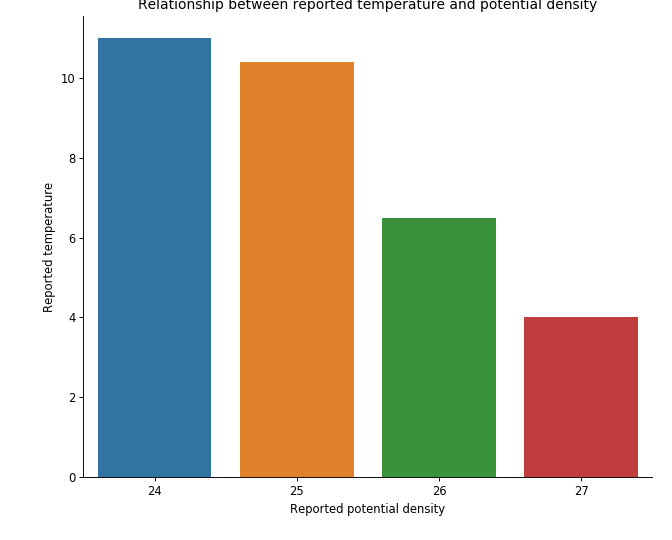

Text(13.819444444444445, 0.5, 'Reported temperature')

In [14]:
%matplotlib notebook
sns.factorplot(x="r_sigma_roundup", y="r_temp_roundup", data=sub2, kind="bar", ci=None)
plt.title ('Relationship between reported temperature and potential density')
plt.xlabel('Reported potential density')
plt.ylabel('Reported temperature')


# CHI_Squared

In [15]:
recode2 = {24: 24, 25: 25, 26: 26, 27: 27}
sub2['COMP1v2']= sub2['r_sigma_roundup'].map(recode2)

In [16]:
# contingency table of observed counts
ct2=pd.crosstab(sub2['r_temp_roundup'], sub2['COMP1v2'])
print (ct2)

COMP1v2         24  25  26  27
r_temp_roundup                
4                0   0   1   6
5                0   0   1   0
6                0   0   3   0
7                0   0   2   0
8                0   0   3   0
9                0   2   0   0
10               0   2   0   0
11               6   6   0   0


In [17]:
# column percentages
colsum=ct2.sum(axis=0)
colpct=ct2/colsum
print(colpct)

COMP1v2              24       25       26       27
r_temp_roundup                                    
4              0.000000 0.000000 0.100000 1.000000
5              0.000000 0.000000 0.100000 0.000000
6              0.000000 0.000000 0.300000 0.000000
7              0.000000 0.000000 0.200000 0.000000
8              0.000000 0.000000 0.300000 0.000000
9              0.000000 0.200000 0.000000 0.000000
10             0.000000 0.200000 0.000000 0.000000
11             1.000000 0.600000 0.000000 0.000000


In [18]:
sub3=sub2.copy()
cat = [24,25,26,27]

for x in range(0,len(cat)-1):
    for y in range(x+1,len(cat)):
        recode = {cat[x]:cat[x], cat[y]:cat[y]}
        
        sub3['temp'] = sub3['r_sigma_roundup'].map(recode)
        cont=pd.crosstab(sub3['r_temp_roundup'], sub3['temp'])
        
        cs= scipy.stats.chi2_contingency(cont)
        print("\n", cat[x], " versus ", cat[y],
              "Chi value: ", cs[0], "\tp value: ", cs[1])


 24  versus  25 Chi value:  3.1999999999999997 	p value:  0.2018965179946554

 24  versus  26 Chi value:  16.0 	p value:  0.006844073922420431

 24  versus  27 Chi value:  8.333333333333334 	p value:  0.003892417122778637

 25  versus  26 Chi value:  20.0 	p value:  0.005569683072945574

 25  versus  27 Chi value:  16.0 	p value:  0.0011339842897853216

 26  versus  27 Chi value:  12.342857142857143 	p value:  0.014975740400189464
